In [72]:
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import pickle

In [12]:
df=pd.read_csv('C:/Users/DELL/Desktop/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
df.bathrooms.value_counts()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

In [17]:
df.bedrooms.value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [18]:
df.stories.value_counts()

2    238
1    227
4     41
3     39
Name: stories, dtype: int64

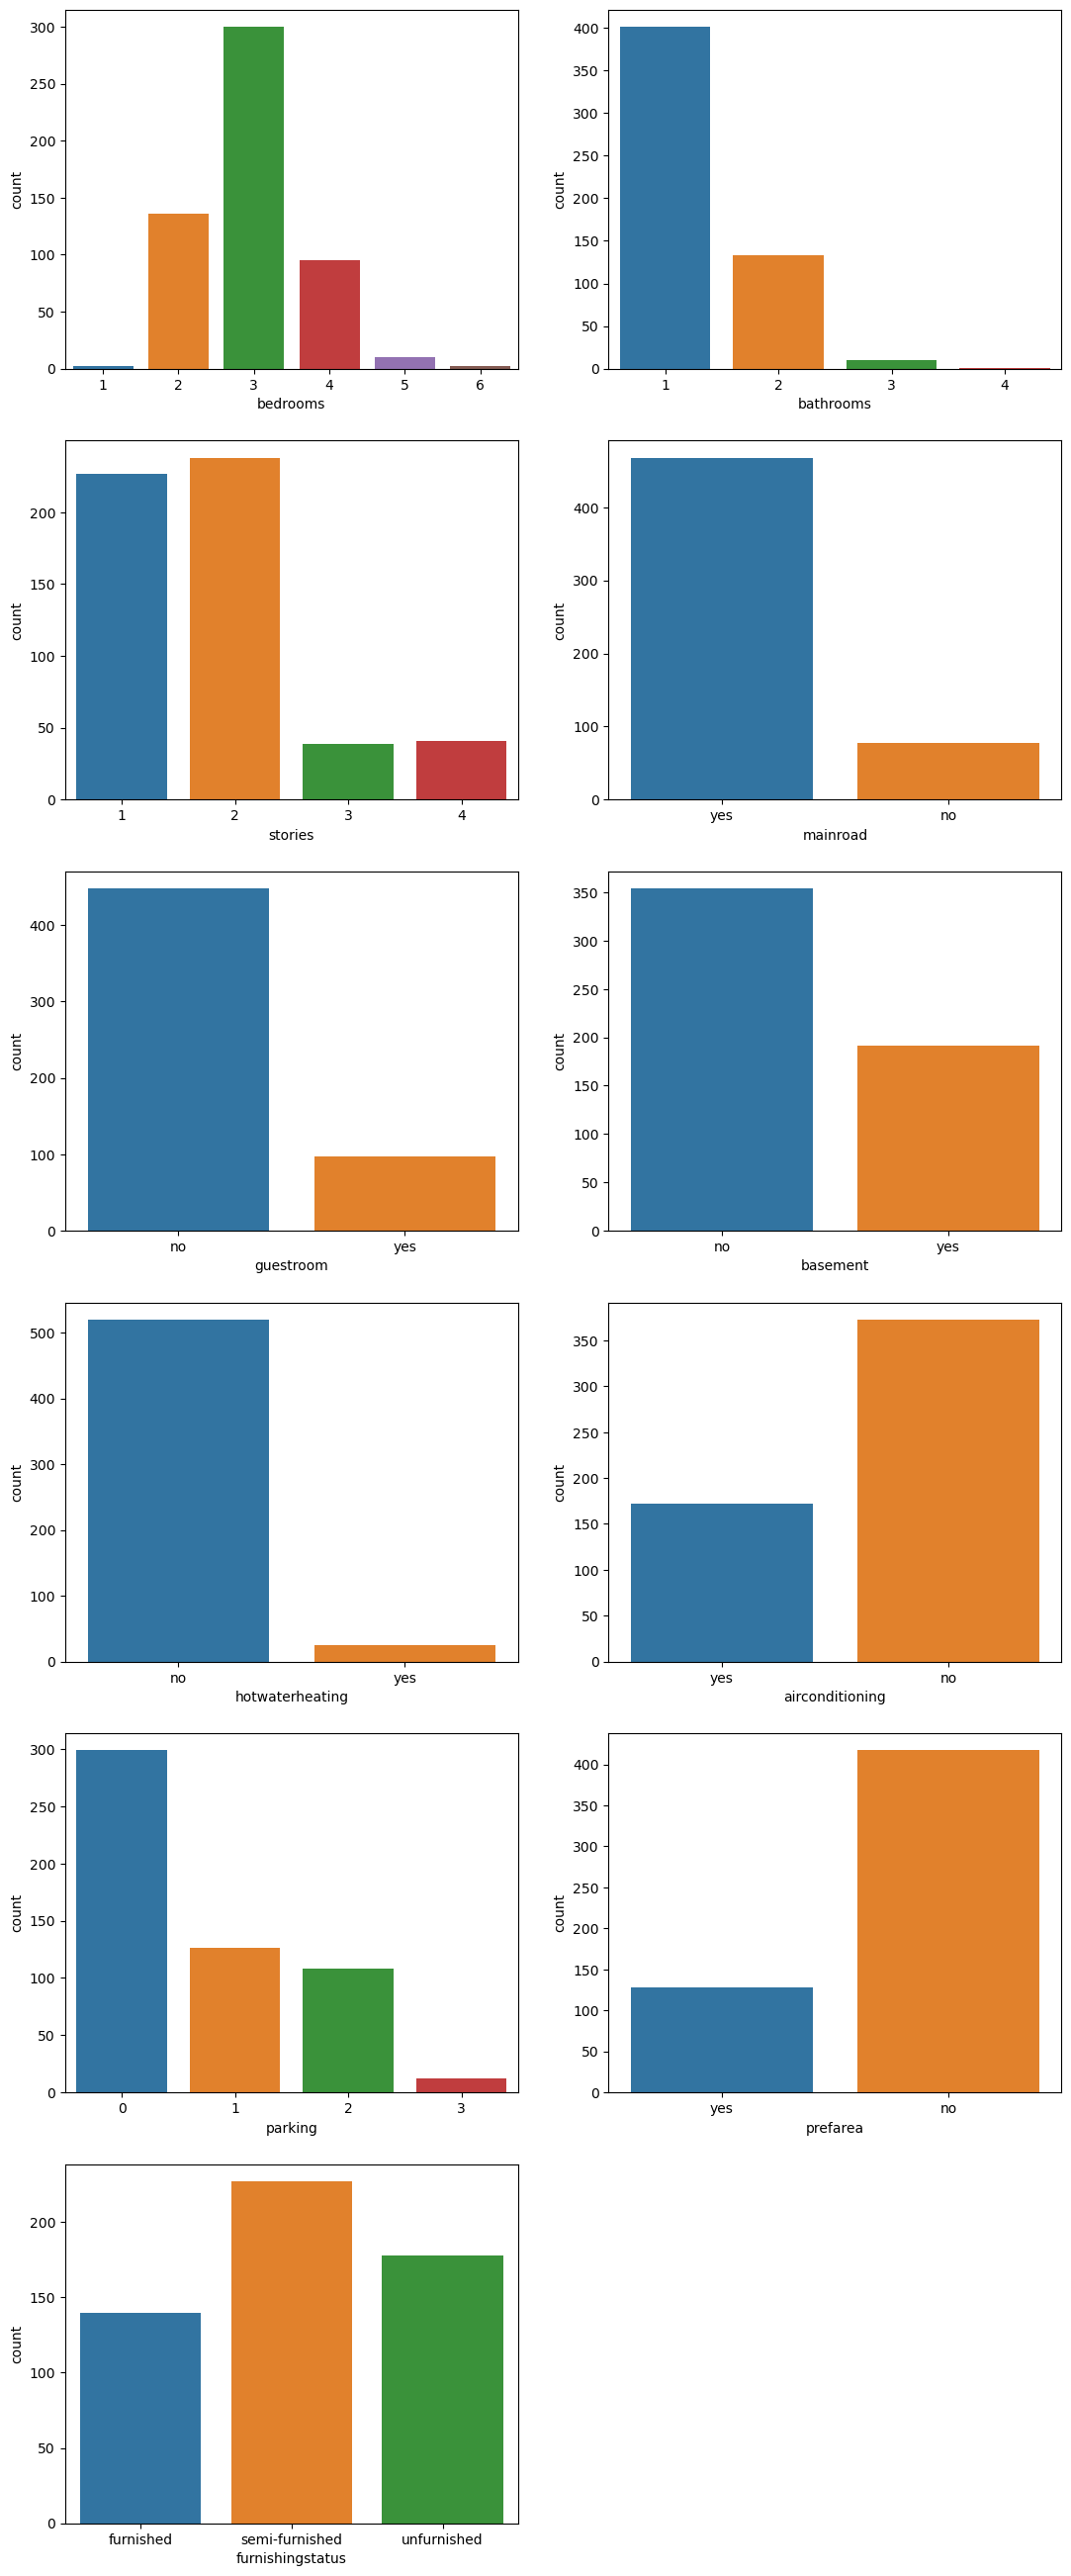

In [19]:
col=['bedrooms','bathrooms','stories','mainroad',
     'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea',
     'furnishingstatus']
i = 0
num_rows = 6
num_cols = 2

while i < len(col):
    fig = plt.figure(figsize=[13, 33])
    j = 0
    while (j < num_rows*num_cols) and (i < len(col)):
        plt.subplot(num_rows, num_cols, j+1)
        sns.countplot(x=col[i], data=df)
        i += 1
        j += 1
   
plt.show()

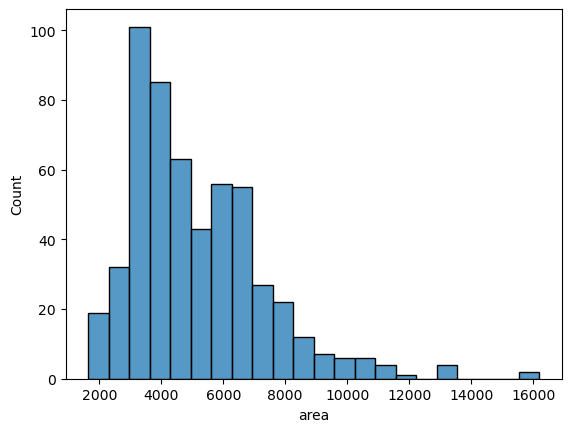

In [20]:
sns.histplot(x=df.area)

x = list(range(len(df.area)))

## Findings:
* The most bedrooms number is 3.
* The most bathrooms number is 1.
* The most stories number in this data is. 2 .
* The most of mainroad is yes in this data.
* Most popular of  guestroom ,basment,hotwaterheating ,airconditioing and prefarea is no
* Most popular of  parking is 0
* Semi-furnished is the most popular furnished in this data set.


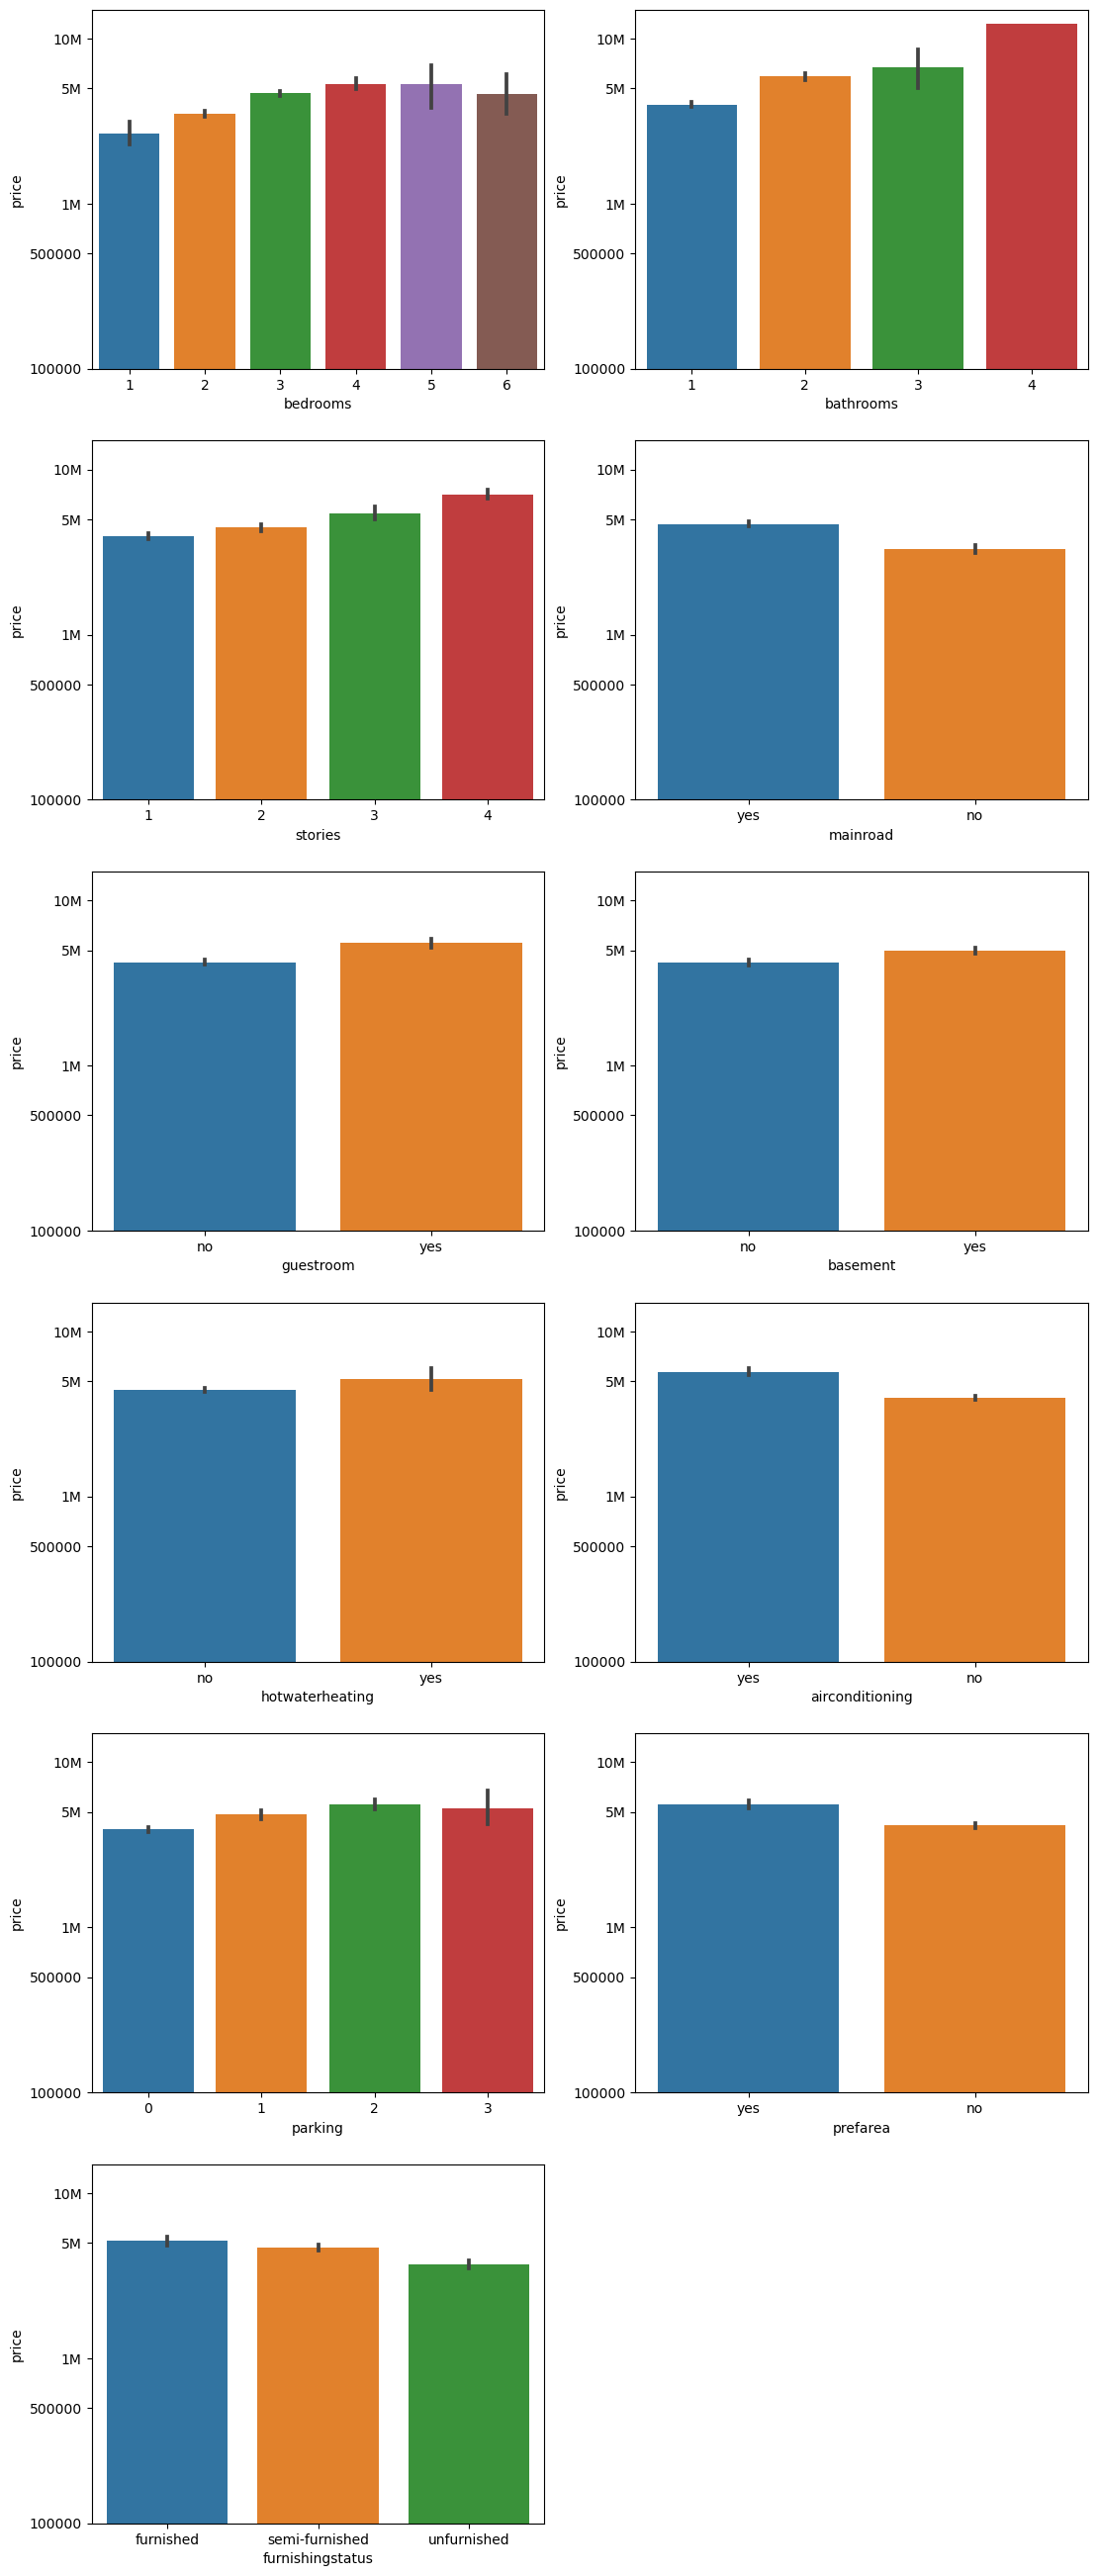

In [21]:

import numpy as np
i = 0
num_rows = 6
num_cols = 2

df['price'] = np.log(df['price'])  # log-transform the price variable

while i < len(col):
    fig = plt.figure(figsize=[13, 33])
    j = 0
    while (j < num_rows*num_cols) and (i < len(col)):
        plt.subplot(num_rows, num_cols, j+1)
        sns.barplot(x=col[i], data=df, y='price')
        plt.ylim(np.log(100000), np.log(15000000))  # set y-axis limits in log scale
        plt.yticks(np.log([100000, 500000, 1000000, 5000000, 10000000]), # set y-tick labels in original scale
                   [100000, 500000, '1M', '5M', '10M'])
        i += 1
        j += 1
   
plt.show()

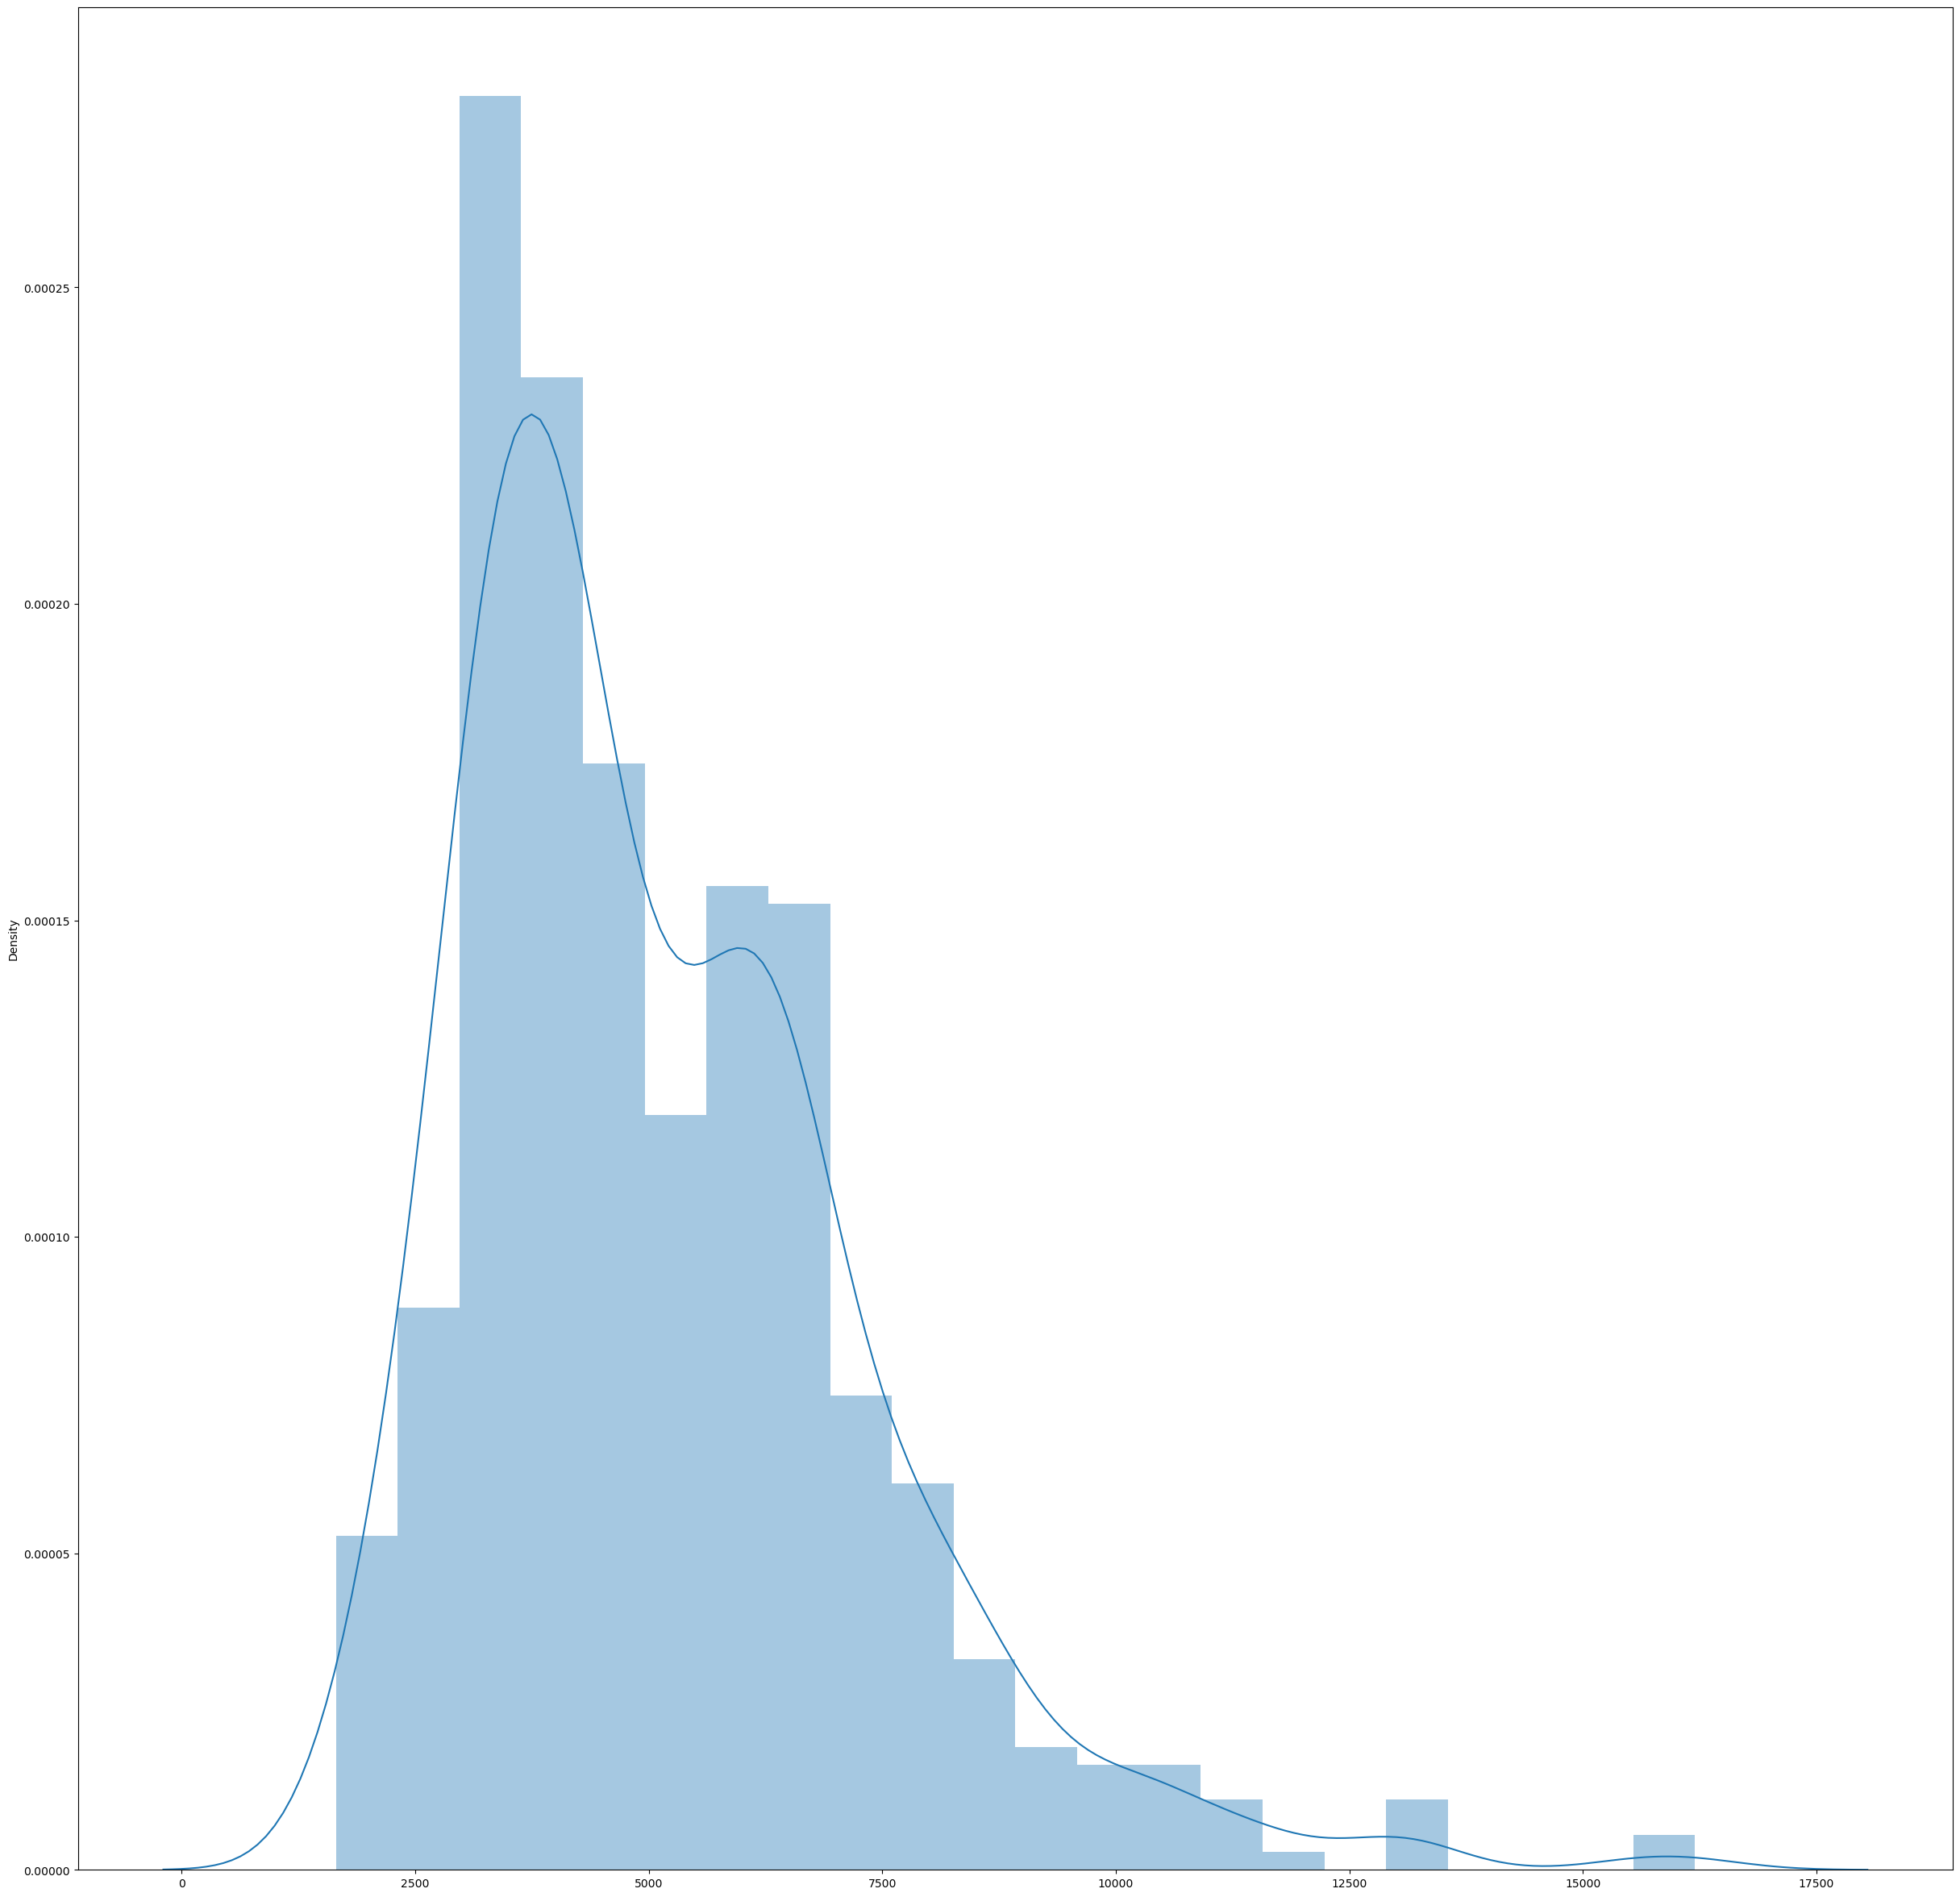

In [22]:
plt.figure(figsize=(30,30))
sns.distplot(x=df.area)
plt.show()

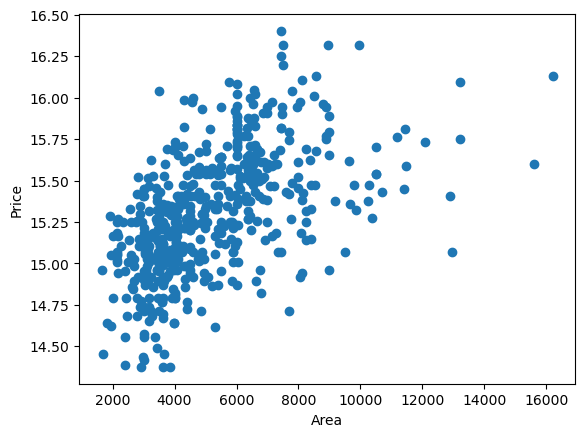

In [23]:

plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Findings 
* The more bedrooms,bathrooms,parkings making the more price.
* If one of the following features are here from (mainroad,have guest room, basement,have hot water heating,have air conditional,preafare)  lead to increase the price.
* when the house is furnished the price incresed.

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,16.321036,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,16.321036,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,16.318175,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,16.250001,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
Ycol = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
i=0
for col in Ycol:
    df[col]=df[Ycol[i]].replace({'yes':1,'no':0},)
    i+=1
df    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,16.321036,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,16.321036,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414347,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,14.384879,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,14.375126,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,14.375126,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [26]:

NDF=pd.get_dummies(df.furnishingstatus)
NDF


,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [27]:
df=pd.concat([df,NDF],axis=1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,16.321036,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,16.321036,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414347,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,0,1
541,14.384879,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,0,1,0
542,14.375126,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,0,1
543,14.375126,2910,3,1,1,0,0,0,0,0,0,0,furnished,1,0,0


In [28]:
df.drop(['furnishingstatus'],axis=1,inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,16.321036,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,16.321036,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414347,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,14.384879,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,14.375126,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,14.375126,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [29]:
df.drop(['unfurnished'],axis=1,inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,16.321036,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,16.321036,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414347,3000,2,1,1,1,0,1,0,0,2,0,0,0
541,14.384879,2400,3,1,1,0,0,0,0,0,0,0,0,1
542,14.375126,3620,2,1,1,1,0,0,0,0,0,0,0,0
543,14.375126,2910,3,1,1,0,0,0,0,0,0,0,1,0


In [30]:
crr=df.corr()
crr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
price,1.000000,0.543233,0.369986,0.485715,0.415281,0.330041,0.277047,0.218401,0.088968,0.455159,0.371638,0.340557,0.226975,0.120211
area,0.543233,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156
bedrooms,0.369986,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040
bathrooms,0.485715,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834
stories,0.415281,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648
mainroad,0.330041,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450
guestroom,0.277047,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821
basement,0.218401,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284
hotwaterheating,0.088968,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819
airconditioning,0.455159,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179


<Axes: >

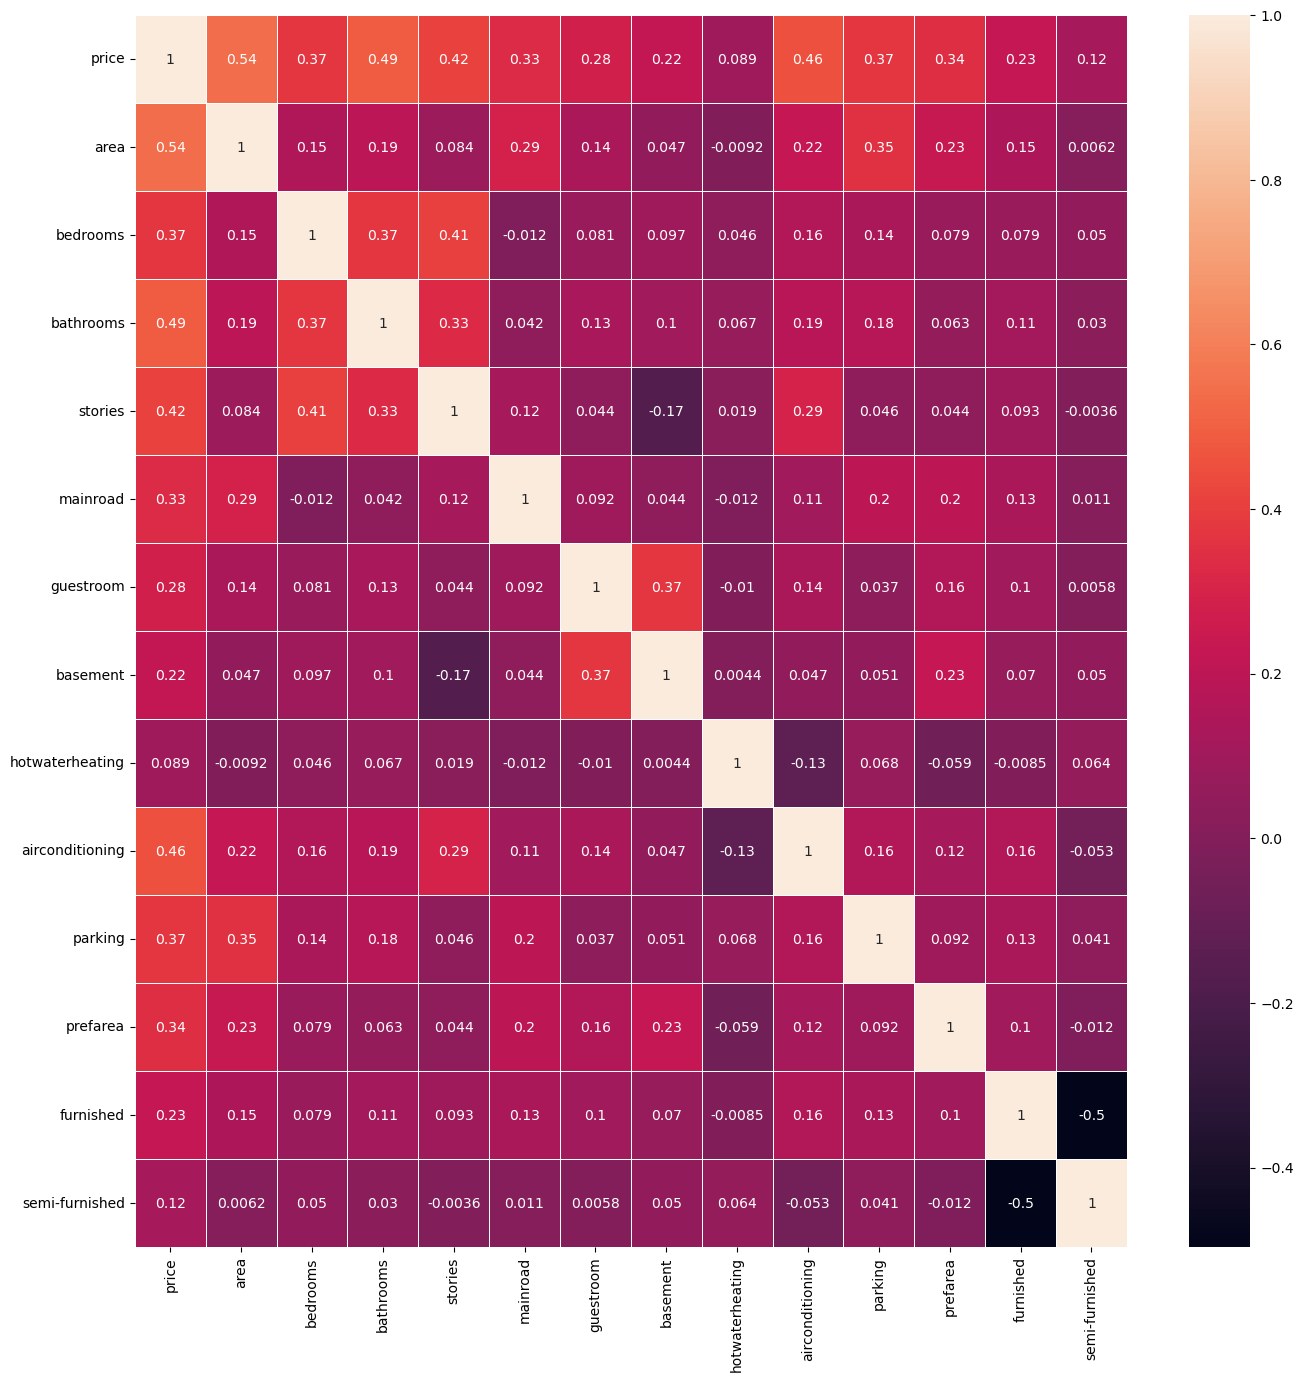

In [31]:
plt.figure(figsize=[16,16])
sns.heatmap(crr,annot=True, linewidths=.5,)